In [ ]:
# ========== Library import ==========
import numpy as np
import random
import matplotlib.pyplot as plt
import inspect

# ========== Parameter Matrix generation ==========
N = 5  # Maximum number of the possible peak
Data_size = 300000

# Set of Parameters ready
Parameters = np.zeros((Data_size, N, 3)) 
print(Parameters.shape)

(300000, 5, 3)


In [ ]:
def Lorentzian(x, *args):
    '''returns sum of Multi-Lorentzian functions
    corresponding to each three parameters:
    amplitude, center, width'''

    # in physics arg = [1, 2, 3, 4, 5, 6]
    amplitude = args[::3]
    center = args[1::3]
    width = args[2::3]

    result = 0
    for i in range(len(center)):
        result += amplitude[i] * ( width[i]**2 / ((x-center[i])**2 + width[i]**2))

    return result  


In [ ]:
# ========== x-domain range ==========
x = np.arange(-2, 7, 0.01)
print(len(x))

900


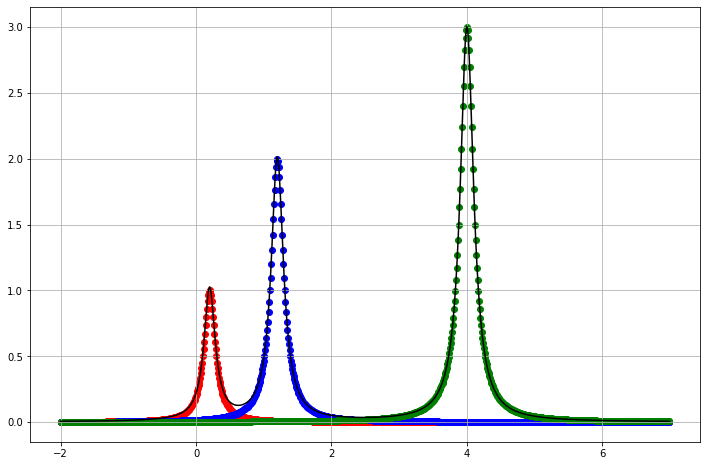

In [ ]:
# ========== Checking out of the Lorentzian function ==========
params = [1, 0.2, 0.1, 2, 1.2, 0.11, 3, 4, 0.12]

plt.figure(figsize = (12, 8))
plt.plot(x, Lorentzian(x, *params), color = 'black')

plt.scatter(x, Lorentzian(x, *params[:3]), color = 'red')
plt.scatter(x, Lorentzian(x, *params[3:6]), color = 'blue')
plt.scatter(x, Lorentzian(x, *params[6:]), color = 'green')
plt.grid(True)
plt.show()

### Parameter Matrix(amplitude, center, width) generation

In [ ]:
# ========== Generation of Lorentzian Parameters with Matrix Form ==========

for i in range(len(Parameters)): # For each matrix in Parameter set..
    for j in range(Parameters.shape[1]): # For each row in each matrix..
        
        # append three arguments that will be used in Lorentzian function
        # amplitude = 1 ~ 5 사이의 실수
        # center    = 0 ~ 10 사이의 실수
        # width     = 0.1 ~ 0.5 사이의 실수

        a = 1 + 0.5 * np.random.rand() - 0.25
        b = 2 + 0.5 * np.random.rand() - 0.25
        c = 3 + 0.5 * np.random.rand() - 0.25
        d = 4 + 0.5 * np.random.rand() - 0.25
        e = 5 + 0.5 * np.random.rand() - 0.25

        Parameters[i][0] = np.array([[1 + 4* np.random.rand(), a, 0.4*np.random.rand() + 0.1 ]])
        Parameters[i][1] = np.array([[1 + 4* np.random.rand(), b, 0.4*np.random.rand() + 0.1 ]])
        Parameters[i][2] = np.array([[1 + 4* np.random.rand(), c, 0.4*np.random.rand() + 0.1 ]])
        Parameters[i][3] = np.array([[1 + 4* np.random.rand(), d, 0.4*np.random.rand() + 0.1 ]])
        Parameters[i][4] = np.array([[1 + 4* np.random.rand(), e, 0.4*np.random.rand() + 0.1 ]])

        
# Check out
print(Parameters)

[[[3.22399879 0.94935523 0.24691127]
  [3.69822729 2.17946546 0.25578862]
  [1.51818544 3.04609751 0.23232316]
  [2.55151683 3.98030973 0.22656274]
  [2.63103356 5.0358972  0.21390035]]

 [[1.8240256  1.09012714 0.10541365]
  [4.71873893 2.20999815 0.43976586]
  [4.53810975 3.07825216 0.13425779]
  [2.00068189 3.8586958  0.2699998 ]
  [3.33802079 4.9417572  0.25866402]]

 [[3.10103516 0.87748461 0.37268539]
  [1.2766406  2.1221064  0.15778284]
  [3.73370288 3.02606685 0.31454779]
  [2.86288232 3.84122337 0.39799712]
  [4.20144635 5.10564165 0.38512838]]

 ...

 [[4.8319101  0.89785764 0.2438575 ]
  [1.67566126 1.95118359 0.32994351]
  [3.2703864  3.20499964 0.19716879]
  [3.1217224  4.09576817 0.31213128]
  [3.52430478 5.14390351 0.48192418]]

 [[2.61284658 0.84269778 0.46367305]
  [4.65918055 1.76856337 0.1748174 ]
  [1.93325625 2.96339486 0.19365813]
  [1.84823961 3.82152773 0.18762364]
  [3.2952794  5.01322813 0.25171101]]

 [[1.68446519 0.95922302 0.13535577]
  [2.23243188 2.217630

### Dataset Generation

In [ ]:
# ========== Data Generation ==========
GRAPH = []  # y-value of the lorentzian
AREA = []   # area
NUM_PEAK = [] # number of peak
AMPLITUDE = [] # amplitude
CENTER = [] # center
WIDTH = [] # width

for j in Parameters:

    peak = random.randint(1, N) # Random selection of Possible peak number
    j = list(j.reshape((3*N, ))) # reshape to put it as *args

    if peak == 1:
        GRAPH.append(Lorentzian(x, *j[0:3*peak]))
        AREA.append(sum(Lorentzian(x, *j[0:3*peak])))
        NUM_PEAK.append(peak)
        AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[0]))
        CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[0]))
        WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[0]))

    elif peak == 2:
        GRAPH.append(Lorentzian(x, *j[0:3*peak]))
        AREA.append(sum(Lorentzian(x, *j[0:3*peak])))
        NUM_PEAK.append(peak)
        AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[0]))
        CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[0]))
        WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[0]))

    elif peak == 3:
        GRAPH.append(Lorentzian(x, *j[0:3*peak]))
        AREA.append(sum(Lorentzian(x, *j[0:3*peak])))
        NUM_PEAK.append(peak)
        AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[0]))
        CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[0]))
        WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[0]))

    elif peak == 4:
        GRAPH.append(Lorentzian(x, *j[0:3*peak]))
        AREA.append(sum(Lorentzian(x, *j[0:3*peak])))
        NUM_PEAK.append(peak)
        AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[0]))
        CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[0]))
        WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[0]))

    elif peak == 5:
        GRAPH.append(Lorentzian(x, *j[0:3*peak]))
        AREA.append(sum(Lorentzian(x, *j[0:3*peak])))
        NUM_PEAK.append(peak)
        AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[0]))
        CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[0]))
        WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[0]))



In [ ]:
# ========== Conversion to numpy array
GRAPH = np.array(GRAPH)
AREA = np.array(AREA)
NUM_PEAK = np.array(NUM_PEAK)

AMPLITUDE = np.array(AMPLITUDE)
CENTER = np.array(CENTER)
WIDTH = np.array(WIDTH)

# shape check
print(GRAPH.shape)
print(AREA.shape)
print(NUM_PEAK.shape)

print(AMPLITUDE.shape)
print(CENTER.shape)
print(WIDTH.shape)

(300000, 900)
(300000,)
(300000,)
(300000, 5)
(300000, 5)
(300000, 5)


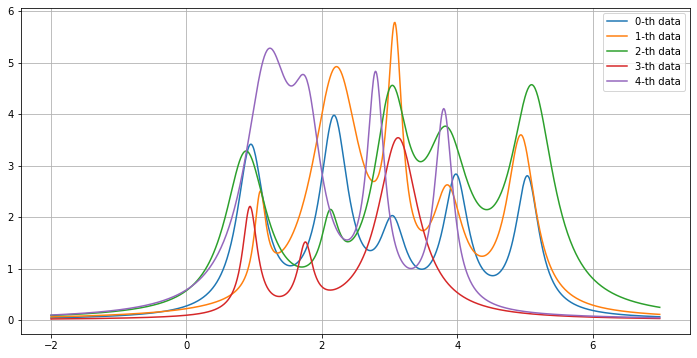

In [ ]:
# ========== Generated Data sample check ==========
plt.figure(figsize = (12, 6))
for i in range(5):
    plt.plot(x, GRAPH[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid(True)
    

In [ ]:
# ========== Data spliting up into three group ==========
# ========== Training / Validation / Test ==========

# lorentzian graph
train_graph = np.array(GRAPH[:200000])
val_graph   = np.array(GRAPH[200000:250000])
test_graph  = np.array(GRAPH[250000:])

# area label
train_area = np.array(AREA[:200000])
val_area   = np.array(AREA[200000:250000])
test_area  = np.array(AREA[250000:])

# number of peak label
train_num_peak = np.array(NUM_PEAK[:200000])
val_num_peak   = np.array(NUM_PEAK[200000:250000])
test_num_peak  = np.array(NUM_PEAK[250000:])

# amplitude label
train_amp = np.array(AMPLITUDE[:200000])
val_amp   = np.array(AMPLITUDE[200000:250000])
test_amp  = np.array(AMPLITUDE[250000:])

# center label
train_center = np.array(CENTER[:200000])
val_center   = np.array(CENTER[200000:250000])
test_center  = np.array(CENTER[250000:])

# width label
train_width = np.array(WIDTH[:200000])
val_width   = np.array(WIDTH[200000:250000])
test_width  = np.array(WIDTH[250000:])


In [ ]:
# ========== Size check ==========
print(train_graph.shape, train_area.shape, train_num_peak.shape, 
      train_amp.shape, train_center.shape, train_width.shape)
print(val_graph.shape, val_area.shape, val_num_peak.shape, 
      val_amp.shape, val_center.shape, val_width.shape)
print(test_graph.shape, test_area.shape, test_num_peak.shape, 
      test_amp.shape, test_center.shape, test_width.shape)


(200000, 900) (200000,) (200000,) (200000, 5) (200000, 5) (200000, 5)
(50000, 900) (50000,) (50000,) (50000, 5) (50000, 5) (50000, 5)
(50000, 900) (50000,) (50000,) (50000, 5) (50000, 5) (50000, 5)


In [ ]:
# ========== reshape for Image-from setting ==========
# 1차원 그래프 변환

train_graph = train_graph.reshape(200000, len(x), 1)
val_graph   = val_graph.reshape(50000, len(x), 1)
test_graph  = test_graph.reshape(50000, len(x), 1)

print(train_graph.shape)
print(val_graph.shape)
print(test_graph.shape)

(200000, 900, 1)
(50000, 900, 1)
(50000, 900, 1)


## 2. Functional API를 활용한 비계층적 구조 신경망 작성

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 900, 1)       0                                            
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 801, 64)      6464        input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_13 (MaxPooling1D) (None, 400, 64)      0           conv1d_13[0][0]                  
__________________________________________________________________________________________________
batch_normalization_17 (BatchNo (None, 400, 64)      256         max_pooling1d_13[0][0]           
____________________________________________________________________________________________

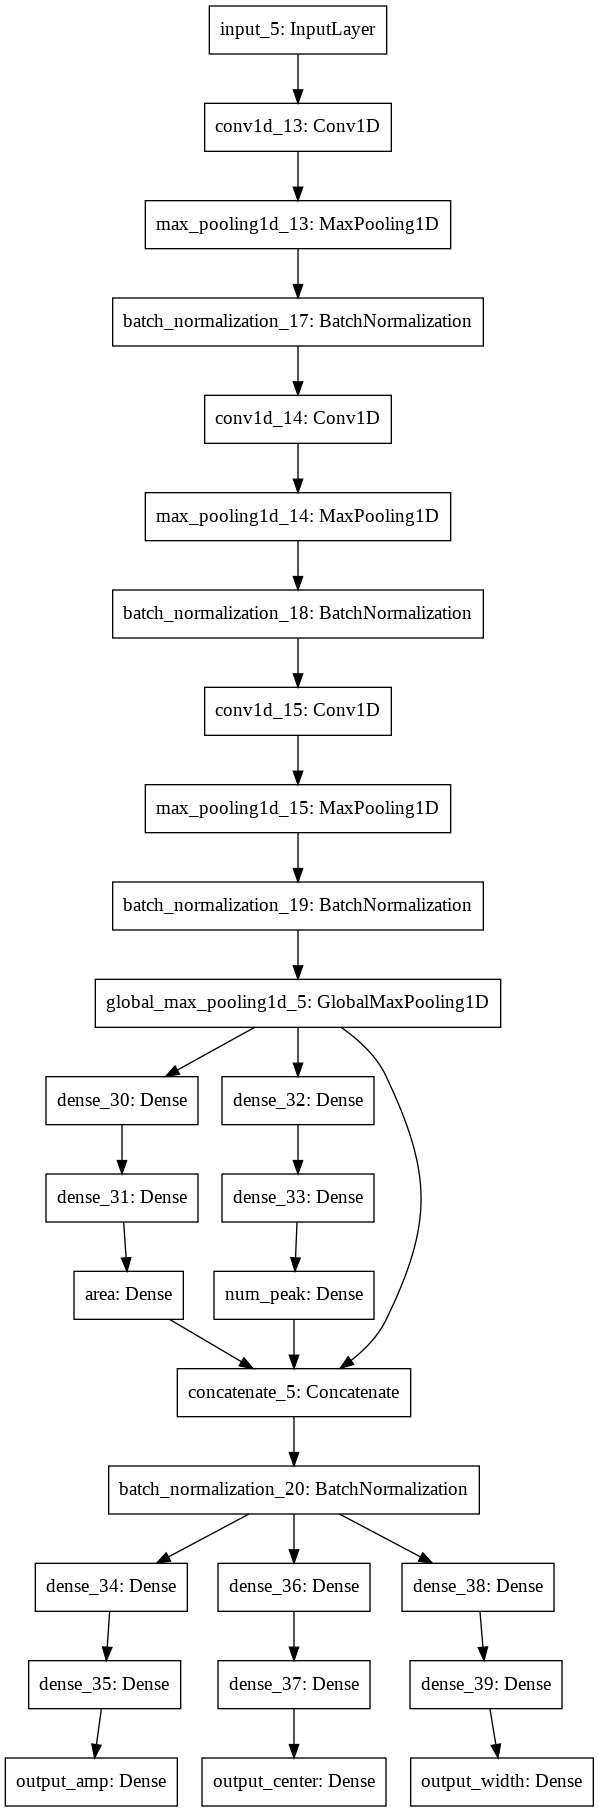

In [ ]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate

# input layer
main_inputs = Input(shape = (len(x), 1))

# At least three Convolution layer is needed => other paper
# Adding BatchNormalization layer => we expect the effect of regularization
x_conv1 = Conv1D(64, kernel_size = 100, activation = 'relu')(main_inputs)
x_pooling1 = MaxPooling1D(pool_size = 2)(x_conv1)
x_batch1 = BatchNormalization()(x_pooling1)

x_conv2 = Conv1D(32, kernel_size = 50, activation = 'relu')(x_batch1)
x_pooling2 = MaxPooling1D(pool_size = 2)(x_conv2)
x_batch2 = BatchNormalization()(x_pooling2)

x_conv3 = Conv1D(16, kernel_size = 25, activation = 'relu')(x_batch2)
x_pooling3 = MaxPooling1D(pool_size = 2)(x_conv3)
x_batch3 = BatchNormalization()(x_pooling3)

x_GMpooling = GlobalMaxPooling1D()(x_batch3)

# output : area
hidden_area1 = Dense(50, activation = 'relu')(x_GMpooling)
hidden_area2 = Dense(50, activation = 'relu')(hidden_area1)
output_area = Dense(1, activation = 'linear', name = 'area')(hidden_area2)

# output : number of peak
hidden_num_peak1 = Dense(50, activation = 'relu')(x_GMpooling)
hidden_num_peak2 = Dense(50, activation = 'relu')(hidden_num_peak1)
output_num_peak = Dense(1, activation = 'linear', name = 'num_peak')(hidden_num_peak2)


# merging features into one layer
merge = concatenate([output_area, output_num_peak, x_GMpooling])
merge2 = BatchNormalization()(merge)

# prediction output
hidden_amp1 = Dense(100, activation = 'relu')(merge2)
hidden_amp2 = Dense(50, activation = 'relu')(hidden_amp1)
output_amp = Dense(5, activation = 'linear', name = 'output_amp')(hidden_amp2)

hidden_center1 = Dense(100, activation = 'relu')(merge2)
hidden_center2 = Dense(50, activation = 'relu')(hidden_center1)
output_center = Dense(5, activation = 'linear', name = 'output_center')(hidden_center2)

hidden_width1 = Dense(100, activation = 'relu')(merge2)
hidden_width2 = Dense(50, activation = 'relu')(hidden_width1)
output_width = Dense(5, activation = 'linear', name = 'output_width')(hidden_width2)



# Definition of model with out input, five output
model = Model(inputs = main_inputs,
              outputs = [output_area, output_num_peak,
                         output_amp, output_center, output_width])

# Summarize layers
print(model.summary())

# plot graph
plot_model(model)

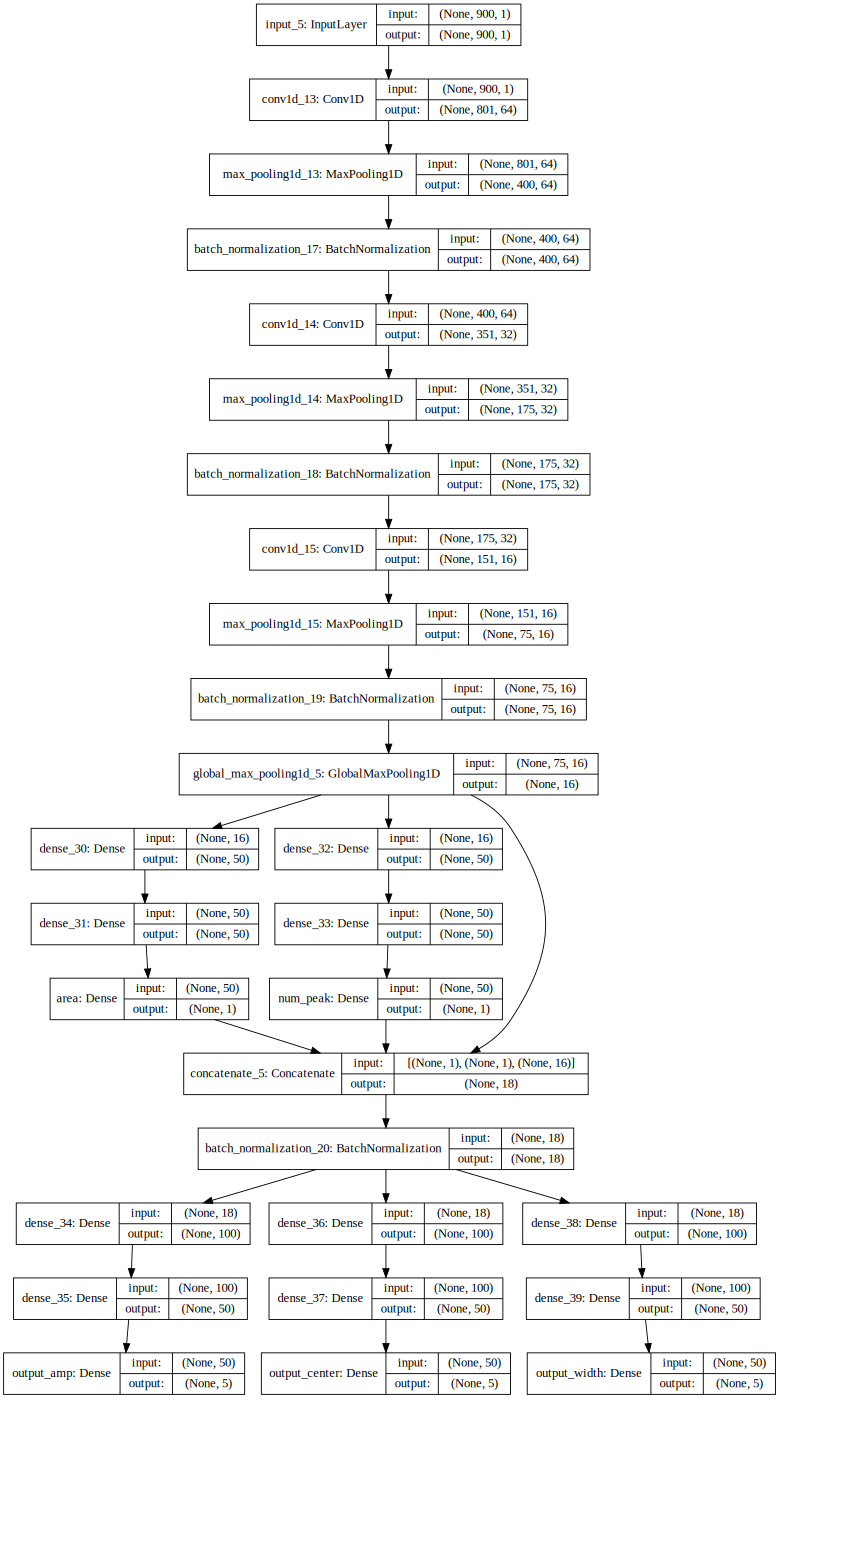

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes = True, expand_nested = True,
                 dpi = 65).create(prog = 'dot', format = 'svg'))


In [ ]:
model.compile(loss = ['mse', 'mse', 'mse', 'mse', 'mse'],
              metrics = ['mae'], 
              optimizer = 'adam')


In [ ]:
%%time
hist = model.fit(train_graph, [train_area, train_num_peak, train_amp, train_center, train_width],
                 epochs = 50,
                 batch_size = 2500,
                 validation_data = (val_graph, 
                                    [val_area, val_num_peak, val_amp, val_center, val_width]),
                 verbose = 2)



Train on 200000 samples, validate on 50000 samples
Epoch 1/50
 - 32s - loss: 753726.3613 - area_loss: 753717.8125 - num_peak_loss: 3.3956 - output_amp_loss: 2.7871 - output_center_loss: 2.2060 - output_width_loss: 0.0346 - area_mae: 744.9617 - num_peak_mae: 1.4302 - output_amp_mae: 1.2637 - output_center_mae: 1.1192 - output_width_mae: 0.1407 - val_loss: 841643.9000 - val_area_loss: 841627.6875 - val_num_peak_loss: 9.3061 - val_output_amp_loss: 3.8981 - val_output_center_loss: 2.8591 - val_output_width_loss: 0.0416 - val_area_mae: 798.7935 - val_num_peak_mae: 2.7345 - val_output_amp_mae: 1.4447 - val_output_center_mae: 1.1338 - val_output_width_mae: 0.1570
Epoch 2/50
 - 23s - loss: 122053.6851 - area_loss: 122048.7500 - num_peak_loss: 1.5457 - output_amp_loss: 1.6807 - output_center_loss: 1.6557 - output_width_loss: 0.0228 - area_mae: 226.1127 - num_peak_mae: 0.9719 - output_amp_mae: 0.9940 - output_center_mae: 0.8990 - output_width_mae: 0.1160 - val_loss: 440996.6531 - val_area_loss: 

In [ ]:
for key in hist.history.keys():
    print(key)  # list of every loss function names

val_loss
val_area_loss
val_num_peak_loss
val_output_amp_loss
val_output_center_loss
val_output_width_loss
val_area_mae
val_num_peak_mae
val_output_amp_mae
val_output_center_mae
val_output_width_mae
loss
area_loss
num_peak_loss
output_amp_loss
output_center_loss
output_width_loss
area_mae
num_peak_mae
output_amp_mae
output_center_mae
output_width_mae


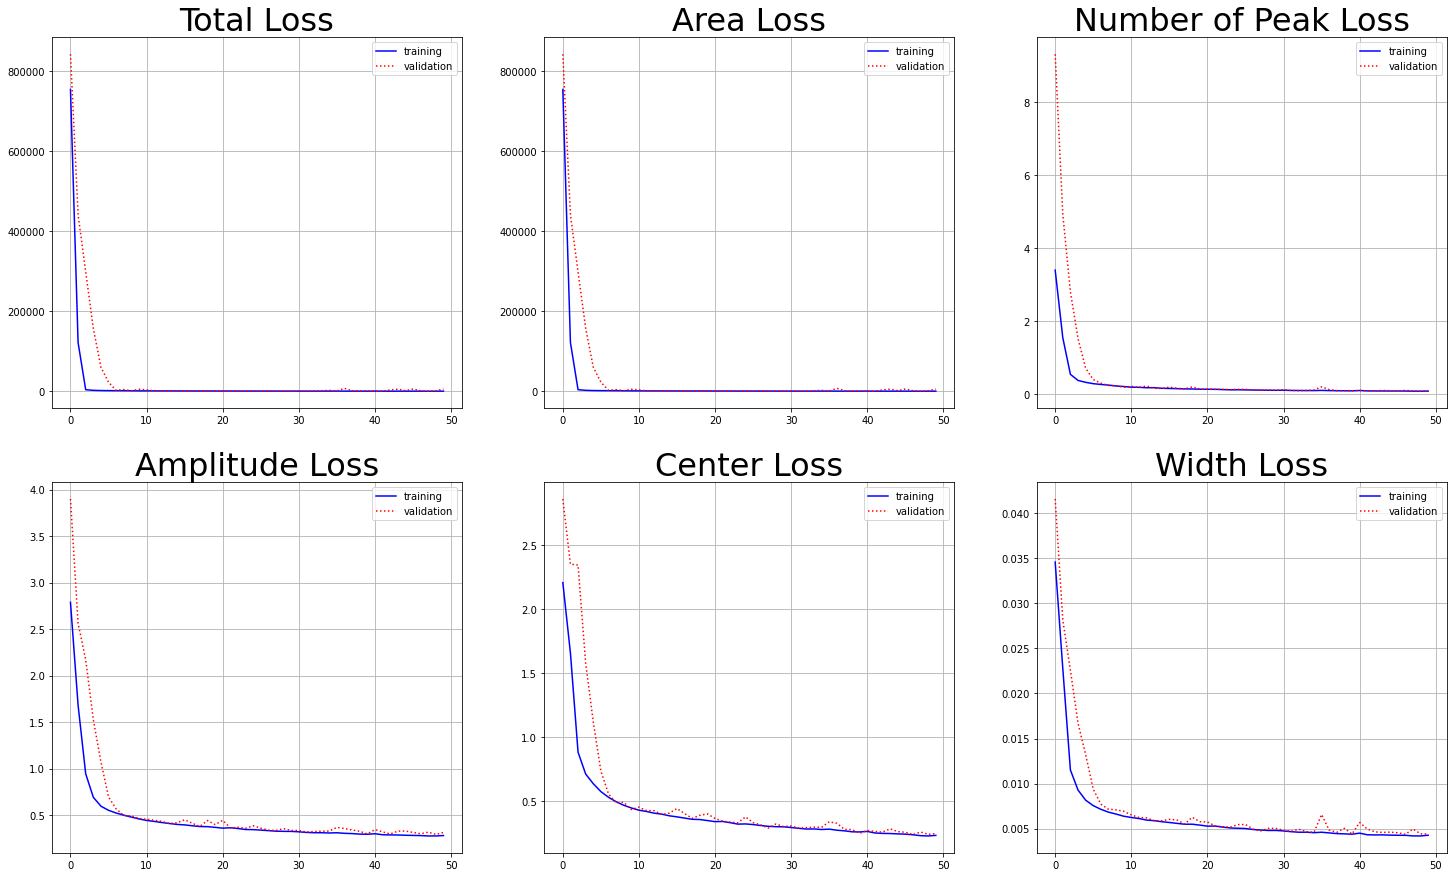

In [ ]:
plt.figure(figsize = (25, 15))

plt.subplot(231)
plt.plot(hist.history['loss'], 'b-', label = 'training')
plt.plot(hist.history['val_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Total Loss", size = 32)
plt.legend()

plt.subplot(232)
plt.plot(hist.history['area_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_area_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Area Loss", size = 32)
plt.legend()

plt.subplot(233)
plt.plot(hist.history['num_peak_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_num_peak_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Number of Peak Loss", size = 32)
plt.legend()

plt.subplot(234)
plt.plot(hist.history['output_amp_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_amp_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Amplitude Loss", size = 32)
plt.legend()

plt.subplot(235)
plt.plot(hist.history['output_center_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_center_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Center Loss", size = 32)
plt.legend()

plt.subplot(236)
plt.plot(hist.history['output_width_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_width_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Width Loss", size = 32)
plt.legend()



In [ ]:
print(test_graph.shape)

(50000, 900, 1)


In [ ]:
prediction = model.predict(test_graph)
print(len(prediction))

5


In [ ]:
print(prediction[0].shape)  # area
print(prediction[1].shape)  # num_peak
print(prediction[2].shape)  # amplitude
print(prediction[3].shape)  # center
print(prediction[4].shape) # width

(50000, 1)
(50000, 1)
(50000, 5)
(50000, 5)
(50000, 5)


In [ ]:
for i in range(10):
    print("Predicted area:", prediction[0][i])
    print("True area:", test_area[i])

    print("Predicted num_peak:", prediction[1][i])
    print("True num_peak:", test_num_peak[i])

    print("Predicted amplitude:", prediction[2][i])
    print("True amplitude:", test_amp[i])

    print("Predicted center:", prediction[3][i])
    print("True center:", test_center[i])

    print("Predicted width:", prediction[4][i])
    print("True width:", test_width[i])
    print('======================================================================')

Predicted area: [515.5506]
True area: 510.18593444084195
Predicted num_peak: [2.3146412]
True num_peak: 2
Predicted amplitude: [ 2.2215128   3.920681    0.10514469  0.2208182  -0.05488895]
True amplitude: [2.08049343 4.37908729 0.         0.         0.        ]
Predicted center: [0.7559253  2.193267   0.15844084 0.05943329 0.05981904]
True center: [0.75034992 2.12025762 0.         0.         0.        ]
Predicted width: [0.15083694 0.27424207 0.13342053 0.01869899 0.01782106]
True width: [0.20724564 0.28753985 0.         0.         0.        ]
Predicted area: [1563.6107]
True area: 1458.852559278388
Predicted num_peak: [4.990368]
True num_peak: 5
Predicted amplitude: [4.3083797 2.7956133 3.131679  3.3421335 3.5453978]
True amplitude: [3.83039656 1.4170932  1.93272349 2.68306922 4.55534674]
Predicted center: [1.0013947 2.0842924 3.0857708 3.9062905 5.0350947]
True center: [0.92914657 1.99848815 2.87248422 4.15448185 4.97572399]
Predicted width: [0.34853858 0.25536254 0.3225733  0.319460

## 3. Visualization of the Result

In [ ]:
for i in range(5):

    if test_num_peak[i] == 5:
        params = []
        for i in range(N):
            params.append(prediction[2][i])
            params.append(prediction[3][i])
            params.append(prediction[4][i])
        
        true_params = []
        for i in range(N):
            true_params.append(test_amp[i])
            true_params.append(test_center[i])
            true_params.append(test_amp[i])

        print(params)
        print(true_params)
        #plt.plot( Lorentzian(x, *params), label = 'prediction')
        #plt.plot( Lorentzian(x, *true_params), label = 'true')
        #plt.grid(True)
        #plt.legend()
        #plt.show()

[array([ 2.2215128 ,  3.920681  ,  0.10514469,  0.2208182 , -0.05488895],
      dtype=float32), array([0.7559253 , 2.193267  , 0.15844084, 0.05943329, 0.05981904],
      dtype=float32), array([0.15083694, 0.27424207, 0.13342053, 0.01869899, 0.01782106],
      dtype=float32), array([4.3083797, 2.7956133, 3.131679 , 3.3421335, 3.5453978],
      dtype=float32), array([1.0013947, 2.0842924, 3.0857708, 3.9062905, 5.0350947],
      dtype=float32), array([0.34853858, 0.25536254, 0.3225733 , 0.31946096, 0.28959072],
      dtype=float32), array([ 1.8538727 ,  0.03634976, -0.08074915,  0.04714663,  0.00880658],
      dtype=float32), array([ 1.039317  , -0.11668071, -0.14495085,  0.0637722 ,  0.09525901],
      dtype=float32), array([ 0.14795315,  0.00480229,  0.02145258, -0.0097766 ,  0.00971242],
      dtype=float32), array([3.436975  , 0.8093442 , 4.8067045 , 1.1234403 , 0.09204434],
      dtype=float32), array([ 0.895118  ,  2.1690652 ,  2.816088  ,  2.111919  , -0.02236111],
      dtype=floa